The aim in terms of technological wise here is to create a disruption prediction model using [Twitter Datasets from Crises](https://crisisnlp.qcri.org/lrec2016/lrec2016.html), from a business problem stand point we wanted to see the model's reaction time - in other words mean see how quickly the model could predict a disruption after a crisis has happened

In [1]:
import pandas as pd
import os 

### Loading data

Load labeled data annotated by paid workers

In [238]:
os.chdir("..")
os.chdir("CrisisNLP_labeled_data_crowdflower")

In [239]:
# List of data folders
folders = ['2015_Nepal_Earthquake_en',
 '2015_Cyclone_Pam_en',
 '2014_Middle_East_Respiratory_Syndrome_en',
 '2014_India_floods',
 '2014_Pakistan_floods',
 '2014_ebola_cf',
 '2014_California_Earthquake',
 '2013_Pakistan_eq',
 '2014_Hurricane_Odile_Mexico_en',
 '2014_Chile_Earthquake_en',
 '2014_Philippines_Typhoon_Hagupit_en']

# Intialize one dataframe
all_data_paid = pd.DataFrame()

# Loop over each folder and file
for folder in folders:
    for file in os.listdir(folder):

        if file.endswith(".tsv"):
            # Load the data from file
            file_data = pd.read_csv(os.path.join(folder, file), sep="\t")
                        
            # concat all the data
            all_data_paid = pd.concat([all_data_paid, file_data])

Load data annotated by volunteers

In [51]:
os.chdir("..")
os.chdir("CrisisNLP_volunteers_labeled_data")

In [55]:
# list all folders
folders = ['2015_Nepal_Earthquake_en',
 '2014_Iceland_Volcano_en',
 '2015_Cyclone_Pam_en',
 '2014_Middle_East_Respiratory_Syndrome_en',
 'Landslides_Worldwide_en',
 '2014_California_Earthquake',
 '2014_Hurricane_Odile_Mexico_en',
 '2014_Malaysia_Airline_MH370_en',
 '2014_Chile_Earthquake_en',
 '2014_Philippines_Typhoon_Hagupit_en']

# Load data and concat them into a dataframe
all_data_volunteers = pd.DataFrame()

for folder in folders:
    for file in os.listdir(folder):
        if file.endswith(".csv"):
            # somehow 'utf-8' encoding doesn't work here
            file_data = pd.read_csv(os.path.join(folder, file), encoding='ISO-8859-1')

            all_data_volunteers = pd.concat([all_data_volunteers, file_data])

### Data Exploration

In [240]:
# Paid labeled dataset
print(f'Shape of paid labeled dataset: {all_data_paid.shape}')
all_data_paid.head()

Shape of paid labeled dataset: (20514, 3)


,tweet_id,tweet_text,label
0,'592326564110585856',RT @divyaconnects: Reached #Kathmandu finally!...,other_useful_information
1,'592616512642420737',fears for Foreigners missing in Nepal earthqua...,missing_trapped_or_found_people
2,'592686635520827393',"RT @ParisBurned: 3,700 people dead is absolute...",injured_or_dead_people
3,'593301431366635520',Earthquake in Nepal - Please help Kapil #crowd...,donation_needs_or_offers_or_volunteering_services
4,'592590231519555584',Nepal’s Slowing Economy Set for Freefall Witho...,other_useful_information


## NOT USING THE DATASET BELOW

In [59]:
# Volunteer labeled dataset 
print(f'Shape of volunteer labeled dataset: {all_data_volunteers.shape}')
all_data_volunteers.head()

Shape of volunteer labeled dataset: (25976, 10)


,tweet_id,tweet_time,tweet_author,tweet_author_id,tweet_language,tweet_lon,tweet_lat,tweet_text,tweet_url,label
0,'591903085670215681',Sat Apr 25 09:54:27 +0000 2015,Faali19,2387302745,en,73.547794,32.392816,Dua's for all those affected by the earthquake...,https://twitter.com/Faali19/status/59190308567...,Sympathy and emotional support
1,'591903104276234242',Sat Apr 25 09:54:31 +0000 2015,STERLINGMHOLMES,153876973,en,NaN,NaN,itvnews: Witness to Nepal #earthquake tells it...,https://twitter.com/STERLINGMHOLMES/status/591...,Other relevant information
2,'591903131505659904',Sat Apr 25 09:54:38 +0000 2015,HeenaliVP,421188281,en,NaN,NaN,Absolutely devastated by the destruction to my...,https://twitter.com/HeenaliVP/status/591903131...,Sympathy and emotional support
3,'591903330449907712',Sat Apr 25 09:55:25 +0000 2015,Xennia79,176207969,en,NaN,NaN,Thoughts are with the families in #Nepal,https://twitter.com/Xennia79/status/5919033304...,Sympathy and emotional support
4,'591903857657151488',Sat Apr 25 09:57:31 +0000 2015,Madhurita_,1058658786,en,NaN,NaN,Frightful images! Our prayers echo for everyon...,https://twitter.com/Madhurita_/status/59190385...,Sympathy and emotional support


In [62]:
# Paid labeled dataset
# Check for missing values
print(all_data_paid.isnull().sum())

# Check for some stats
all_data_paid.describe()

tweet_id      0
tweet_text    0
label         0
dtype: int64


,tweet_id,tweet_text,label
count,20514,20514,20514
unique,20514,20514,15
top,'592326564110585856',RT @divyaconnects: Reached #Kathmandu finally!...,other_useful_information
freq,1,1,6126


No missing values, no duplicate values tweet_id/text, dataset looks clean!

In [71]:
# Volunteer labeled dataset
print(all_data_volunteers.isnull().sum())

print(all_data_volunteers.nunique())

tweet_id                0
 tweet_time             0
 tweet_author           0
 tweet_author_id        0
 tweet_language         0
 tweet_lon          22676
 tweet_lat          22676
 tweet_text             0
 tweet_url              0
label                   0
dtype: int64
tweet_id            25965
 tweet_time         24938
 tweet_author       21263
 tweet_author_id    21245
 tweet_language         4
 tweet_lon           3019
 tweet_lat           3012
 tweet_text         25604
 tweet_url          25965
label                  43
dtype: int64


#### Labels Explore

In [241]:
# Explore the labels
# Paid labeled data
print(f"Paid labeled data:\n {all_data_paid['label'].value_counts(normalize=True)}")

Paid labeled data:
 other_useful_information                             0.298625
not_related_or_irrelevant                            0.120503
donation_needs_or_offers_or_volunteering_services    0.119528
injured_or_dead_people                               0.113142
sympathy_and_emotional_support                       0.091986
infrastructure_and_utilities_damage                  0.067954
caution_and_advice                                   0.049283
affected_people                                      0.026860
displaced_people_and_evacuations                     0.026665
missing_trapped_or_found_people                      0.018280
treatment                                            0.018036
disease_signs_or_symptoms                            0.016867
disease_transmission                                 0.016379
prevention                                           0.012333
deaths_reports                                       0.003559
Name: label, dtype: float64


In [270]:
# Volunteer labeled
print(f"Volunteer labeled data:\n {all_data_volunteers['label'].value_counts(normalize=True)}")

Volunteer labeled data:
 Not Informative                        0.259547
Not Relevant                           0.241723
Not physical landslide                 0.143479
Other Relevant Information             0.111872
Response Efforts                       0.038266
Physical landslide                     0.029412
Other relevant information             0.021404
Sympathy and emotional support         0.020981
Not related or irrelevant              0.018363
Informative                            0.017208
Infrastructure Damage                  0.016400
Humanitarian Aid Provided              0.012435
Not related to crisis                  0.010625
Other useful information               0.008238
Caution and advice                     0.007314
Infrastructure and utilities           0.005698
Injured or dead people                 0.004427
Urgent Needs                           0.004158
Volunteer or professional services     0.002926
Requests for Help/Needs                0.002733
Personal update

Comparing volunteer and paid labeled datset, the labels in paid dataset seemed to be more useful for disaster response prediction (eg "injured_or_dead_people", "missing_trapped_or_found_people"). While in volunteer dataset the labels are quite irrelevant (eg majority labels are "Not informative", "Not relevant", "not physical landslide" etc.). <br> <br>
Now we map the labels in the dataset to 3 custom labels that will be predicted by our model: "Disruption", "Potential Disruption", or "No Disruption" <br><br>

Disruption:
1. `infrastructure_and_utilities_damage`: Damage to infrastructure/utilitise directly impacts supply chain, pretty self-explanatory
2. `displaced_people_and_evacuations`: Could possibly imply a serious event that disrupt supply chains
3. `affected_people`: A situatioin where large number of people being affected by a disaster could impact workforce availability and demand patterns
4. `missing_trapped_or_found_people`: This would probably indicate a severe crisis such as earthquake that causes trapped/missing people
5. `death_reports`: Reporting of deaths probably indicate severe disasters which could disrupt supply chain
6. `injured_or_dead_people`



Potential Disruption:
1. `disease_transmission`: Depends on the widespread severity of the disease, so I put this in potential disruption category.
2. `prevention`: Could indicates lockdown or restrictions which is indicative of supply chain disruption.
3. `caution_and_advice`: If there's caution and advice given on incoming disaster, this could indicate a potential disruption.
4. `disease_signs_or_symptoms`: Quite a vague label, but since its linked to disease so I'll put it into potential disruption.
5. `donation_needs_or_offers_or_volunteering_services`: Most involve donations, volunteers, offers of help which could be indicative of an ongoing/potential disruption
6. `treatment`: suggests actions needed to address a crisis. The tweet content contained a mixed of information, but it could potentially cause disruption due to a need in aid and assistance
7. `other_useful_information`: I looked at the some tweet texts with this label and seemed like it contained a mix of information where some could be relevant to SP disruption, but some doesn't, but I will put this into disruption atm due to the natura of the crisis dataset

No disruption:
1. `not_related_or_irrelevant`
2. `sympathy_and_emotional_support`: Focused on emotional support and solidarity, which doesn't directly indicate a disruption

This also indicates that we will be building a multi-class classification model !

### Mapping labels to custom labels (Disruption, Potential Disruption, No disruption)

In [242]:
def map_labels(original_labels):
    disruption_labels = [
        "infrastructure_and_utilities_damage", "displaced_people_and_evacuations",
        "affected_people", "missing_trapped_or_found_people", "death_reports",
        "injured_or_dead_people"
    ]

    potential_disruption_labels = [
        "disease_transmission", "prevention", "caution_and_advice", "disease_signs_or_symptoms",
        "donation_needs_or_offers_or_volunteering services", "treatment", "other_useful_information"
    ]

    if original_labels in disruption_labels:
        return "disruption" 
    elif original_labels in potential_disruption_labels:
        return "potential_disruption" 
    else:
        return "no_disruption" 
    
all_data_paid['custom_labels'] = all_data_paid['label'].apply(map_labels)

In [243]:
all_data_paid.head()

,tweet_id,tweet_text,label,custom_labels
0,'592326564110585856',RT @divyaconnects: Reached #Kathmandu finally!...,other_useful_information,potential_disruption
1,'592616512642420737',fears for Foreigners missing in Nepal earthqua...,missing_trapped_or_found_people,disruption
2,'592686635520827393',"RT @ParisBurned: 3,700 people dead is absolute...",injured_or_dead_people,disruption
3,'593301431366635520',Earthquake in Nepal - Please help Kapil #crowd...,donation_needs_or_offers_or_volunteering_services,no_disruption
4,'592590231519555584',Nepal’s Slowing Economy Set for Freefall Witho...,other_useful_information,potential_disruption


In [244]:
all_data_paid['custom_labels'].value_counts(normalize='True')

potential_disruption    0.411524
no_disruption           0.335576
disruption              0.252900
Name: custom_labels, dtype: float64

Not an imbalanced dataset as each custom labels seemed to have quite proportional number of samples

#### Text data exploration

Text(0, 0.5, 'Number of tweets')

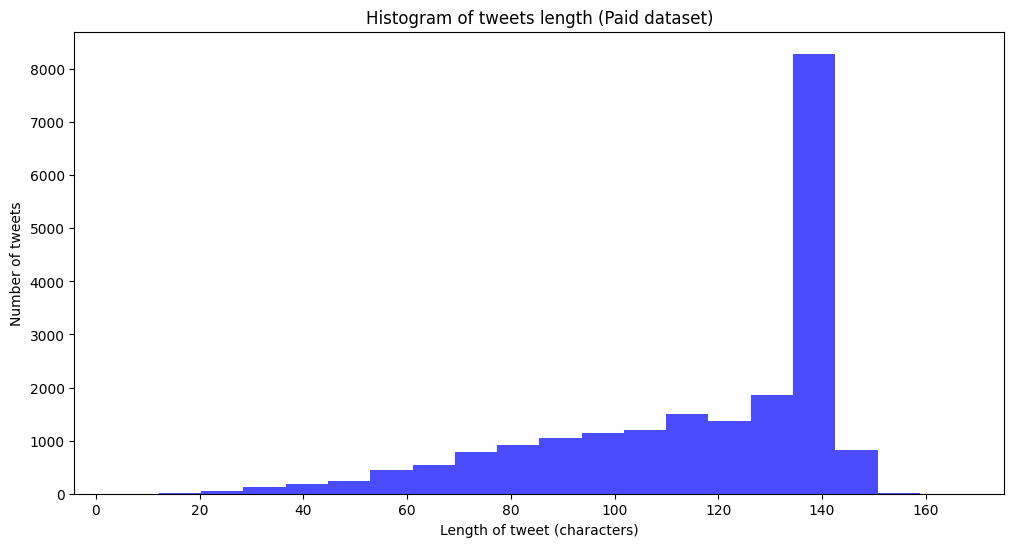

In [245]:
import matplotlib.pyplot as plt

# Look at text length
lengths_paid = all_data_paid['tweet_text'].apply(len)

# Plot histograms
plt.figure(figsize=(12,6))
plt.hist(lengths_paid, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of tweets length (Paid dataset)')
plt.xlabel('Length of tweet (characters)')
plt.ylabel('Number of tweets')

In [246]:
print(f'Mean: {lengths_paid.mean()}')
print(f'Median: {lengths_paid.median()}')

Mean: 117.0183289460856
Median: 130.0


The lengths of tweet histogram are left-skewed as it has a median of tweets length is higher (130.0) than its mean(117), probably because twitter has a character length restriction of ~140 back then, it was changed to 280 chracters now just in case you didn't know.

In [247]:
import re
import string

# Check number of tweets with URL
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
nums_url_paid = all_data_paid['tweet_text'].apply(lambda x: re.search(url_pattern, x) is not None).sum()
nums_url_volunteers = all_data_volunteers[' tweet_text'].apply(lambda x: re.search(url_pattern, x) is not None).sum()

# Check number of tweets with a user mention
mention_pattern = r'@[A-Za-z0-9_]+'
nums_mention_paid = all_data_paid['tweet_text'].apply(lambda x: re.search(mention_pattern, x) is not None).sum()
nums_mention_volunteers = all_data_volunteers[' tweet_text'].apply(lambda x: re.search(mention_pattern, x) is not None).sum()

# Number of tweets containing a hashtag
hashtag_pattern = r'#[A-Za-z0-9_]+'
nums_hashtag_paid = all_data_paid['tweet_text'].apply(lambda x: re.search(hashtag_pattern, x) is not None).sum()
nums_hashtag_volunteers = all_data_volunteers[' tweet_text'].apply(lambda x: re.search(hashtag_pattern, x) is not None).sum()

# Number of capital letters
num_capital_paid = all_data_paid['tweet_text'].apply(lambda x: any(char.isupper() for char in x)).sum()
num_capital_volunteer = all_data_volunteers[' tweet_text'].apply(lambda x: any(char.isupper() for char in x)).sum()

# Number of punctuation
num_punctuation_paid = all_data_paid['tweet_text'].apply(lambda x: any(char in string.punctuation for char in x)).sum()
num_punctuation_volunteers = all_data_volunteers[' tweet_text'].apply(lambda x: any(char in string.punctuation for char in x)).sum()

In [248]:
text_df = pd.DataFrame({
    'Dataset': ['Paid', 'Volunteer'],
    'Links': [nums_url_paid, nums_url_volunteers],
    'Mentions': [nums_mention_paid, nums_mention_volunteers],
    'Hashtag': [nums_hashtag_paid, nums_hashtag_volunteers],
    'Capitals': [num_capital_paid, num_capital_volunteer],
    'Punctuations': [num_punctuation_paid, num_punctuation_volunteers]
})
text_df

,Dataset,Links,Mentions,Hashtag,Capitals,Punctuations
0,Paid,12987,11443,12013,20403,20370
1,Volunteer,14703,6011,14053,25563,25358


Volunteer dataset has more hashtag and links than paid dataset, while paid dataset has more mentions.

### Data preprocessing

I am only going to use the paid dataset since the volunteer dataset has quite a lot of irrelevant labels, which could possibly affects the performance of our model

In [249]:
import re
import string

# Remove URLs
# They are not very informative for text classification tasks
def remove_urls(text):
    url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)

all_data_paid['tweet_text'] = all_data_paid['tweet_text'].apply(remove_urls)

# Lowercasing
# Because the same words in difference cases can be processed differently by the machine 
all_data_paid['tweet_text'] = all_data_paid['tweet_text'].str.lower()

# Remove punctuation
# Provide less information for classification tasks
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

all_data_paid['tweet_text'] = all_data_paid['tweet_text'].apply(remove_punctuation)

In [250]:
# Tokenization
# Basically means splitting the text into individual words
from nltk.tokenize import word_tokenize
all_data_paid['tweet_text'] = all_data_paid['tweet_text'].astype(str)
all_data_paid['tweet_text'] = all_data_paid['tweet_text'].apply(word_tokenize)

# Remove stopwords
# Like ("a", "the", "and" etc.)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

all_data_paid['tweet_text'] = all_data_paid['tweet_text'].apply(remove_stopwords)

# Lemmatization 
# Reducing words to their word stem or root form
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(word) for word in text]

all_data_paid['tweet_text'] = all_data_paid['tweet_text'].apply(lemmatize_text)

In [251]:
all_data_paid.head()

,tweet_id,tweet_text,label,custom_labels
0,'592326564110585856',"[rt, divyaconnects, reached, kathmandu, finall...",other_useful_information,potential_disruption
1,'592616512642420737',"[fear, foreigner, missing, nepal, earthquake, ...",missing_trapped_or_found_people,disruption
2,'592686635520827393',"[rt, parisburned, 3700, people, dead, absolute...",injured_or_dead_people,disruption
3,'593301431366635520',"[earthquake, nepal, please, help, kapil, crowd...",donation_needs_or_offers_or_volunteering_services,no_disruption
4,'592590231519555584',"[nepal, ’, slowing, economy, set, freefall, wi...",other_useful_information,potential_disruption


### Text Vectorization

Vectorization words into a format that can be understood by machine learning model. We will be using TF-IDF which not only counts the occurence of the words but also its importance based on the whole dataset

In [252]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Join back the words into a string
all_data_paid['tweet_text'] = all_data_paid['tweet_text'].apply(" ".join)

# Fit to data and tarnsform
X = vectorizer.fit_transform(all_data_paid['tweet_text'])

### Model Training

In [253]:
from sklearn.model_selection import train_test_split

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, all_data_paid['custom_labels'], test_size=0.2, random_state=42)

#### Logistic Regression

In [265]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='saga')

# Train 
model.fit(X_train, y_train)

LogisticRegression(solver='saga')

In [266]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Evaluate
y_pred = model.predict(X_test)

# Use other metrics such as F1-score / AUC-ROC since the our target prediction (labels) counts are imbalanced
report = classification_report(y_test, y_pred)
print(f"Classification report:\n{report}")

Classification report:
                      precision    recall  f1-score   support

          disruption       0.86      0.74      0.79      1108
       no_disruption       0.80      0.82      0.81      1346
potential_disruption       0.78      0.83      0.80      1649

            accuracy                           0.80      4103
           macro avg       0.81      0.80      0.80      4103
        weighted avg       0.81      0.80      0.80      4103



Performed quite well in general, but one thing that's dissapointing is that it has a recall of 0.74, which is relatively low compare to other classes, which also means it won't catch all the actual disruptions

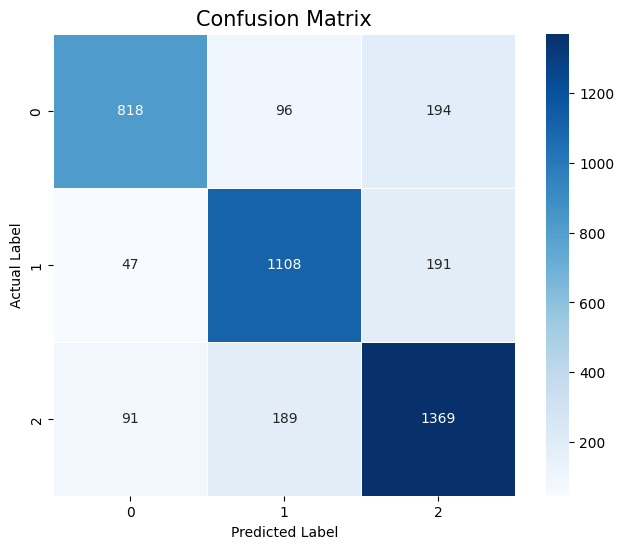

In [258]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Look at confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix', size=15)
plt.show()

#### Decision Tree

In [259]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Predict
y_pred_tree = tree_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_tree, target_names=all_data_paid['custom_labels'].unique()))

                      precision    recall  f1-score   support

potential_disruption       0.75      0.71      0.73      1108
          disruption       0.73      0.74      0.74      1346
       no_disruption       0.72      0.74      0.73      1649

            accuracy                           0.73      4103
           macro avg       0.73      0.73      0.73      4103
        weighted avg       0.73      0.73      0.73      4103



It seemed to me decision tree classifier performed worse than decision tree, so I didn't bother with doing any hyperparameter tuning with this model

#### Support Vector Machine 

In [260]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

# Predict
y_pred_svm = clf.predict(X_test)

# Classification_report
print(classification_report(y_test, y_pred_svm))

                      precision    recall  f1-score   support

          disruption       0.86      0.74      0.79      1108
       no_disruption       0.78      0.84      0.81      1346
potential_disruption       0.79      0.82      0.80      1649

            accuracy                           0.80      4103
           macro avg       0.81      0.80      0.80      4103
        weighted avg       0.81      0.80      0.80      4103



### Gradient Boosting

In [267]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize model
gbc = GradientBoostingClassifier(random_state=42)

# Fit
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred_gbc))

Classification Report:
                      precision    recall  f1-score   support

          disruption       0.84      0.67      0.75      1108
       no_disruption       0.77      0.77      0.77      1346
potential_disruption       0.73      0.82      0.77      1649

            accuracy                           0.76      4103
           macro avg       0.78      0.75      0.76      4103
        weighted avg       0.77      0.76      0.76      4103



### Conclusion

So far it seemed that I would prefer Logistic Regression over the other 2 models as it took lesser time to train and offer results better than Decision Tree and on par with SVM. 
I will use the model and see how well it performs for my case studies first, then decide if any follow-up such as hyperparameter tuning, more feature engineering is needed.

In [268]:
from joblib import dump 

# save vectorizer
dump(vectorizer, "vectorizer.pk1")

# model saving 
dump(model, 'model.joblib')

['model.joblib']